In [ ]:
# import libraries


In [4]:
def get_labels_and_scores(refs, scores):
    # Read the ground truth labels into a dictionary
    reference_labels = {}
    categories = ['n', 'p']
    data = open(refs).readlines()
    for line in data:
        key, val = line.strip().split()
        reference_labels[key] = categories.index(val)
    # Read the system scores into a dictionary
    sys_scores = {}
    data = open(scores).readlines()
    for line in data:
        key, val = line.strip().split()
        sys_scores[key] = float(val)
    del data
    # Ensure all files in the reference have system scores and vice-versa
    if len(sys_scores) != len(reference_labels):
        raise ValueError("Expected the score file to have scores for all files in reference and no duplicates/extra entries")
    # %%
    y_true, y_score = [], []
    for key in reference_labels.keys():
        y_true.append(reference_labels[key])
        y_score.append(sys_scores[key])
    return y_score, y_true, reference_labels, sys_scores

In [10]:
reference_labels = '/home/jmramirez/Documentos/COPERIA/codes-in-tool-release/classifier_BLSTM_model/data/val'
sys_scores = '/home/jmramirez/Documentos/COPERIA/models/coswara_model_by_tasks/results_lr/cough-heavy/val_scores.txt'
y_score, y_true, reference_labels, sys_scores = get_labels_and_scores(reference_labels, sys_scores)

(array([ 4., 10.,  4., 10.,  7.,  6.,  3.,  5.,  6., 14., 20., 14., 24.,
        13., 13., 15.,  7.,  1.,  1.,  2.]),
 array([0.06162348, 0.09794325, 0.13426302, 0.17058279, 0.20690257,
        0.24322234, 0.27954211, 0.31586188, 0.35218165, 0.38850142,
        0.42482119, 0.46114096, 0.49746073, 0.53378051, 0.57010028,
        0.60642005, 0.64273982, 0.67905959, 0.71537936, 0.75169913,
        0.7880189 ]),
 <BarContainer object of 20 artists>)

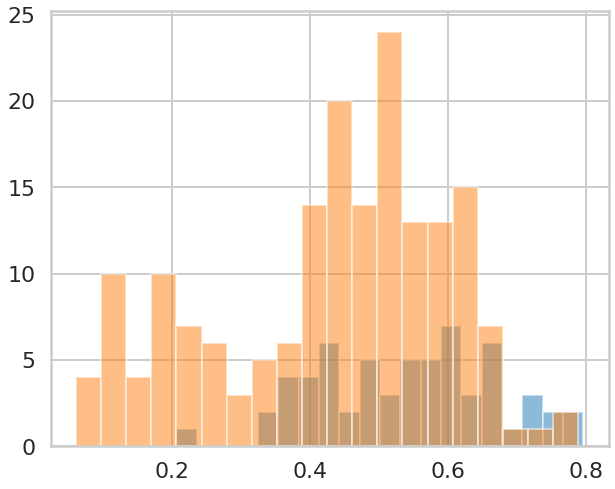

In [16]:
# Plot the scores for the positive class
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
plt.figure(figsize=(10, 8))
plt.hist(np.array(y_score)[np.array(y_true) == 1], bins=20, alpha=0.5, label='Positive')
plt.hist(np.array(y_score)[np.array(y_true) == 0], bins=20, alpha=0.5, label='Negative')